In [1]:
import os
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten#, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# plt.style.use('dark_background')

In [2]:
def plot_imgs(directory):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory, file) for file in all_item_dirs][:5]
    plt.figure(figsize=(20, 20))

    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)
        img = plt.imread(img_path)
        plt.tight_layout()
        plt.imshow(img, cmap='gray')

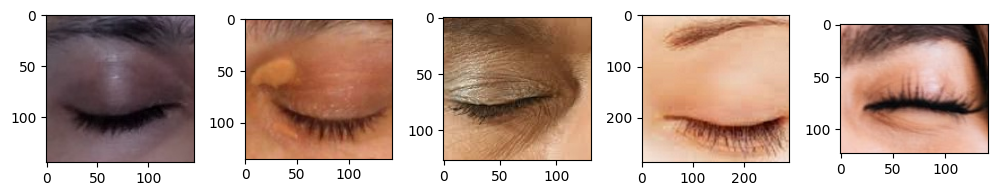

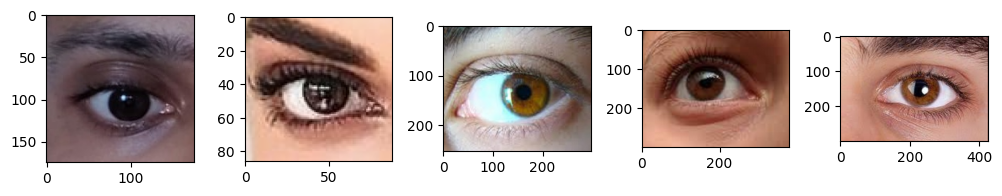

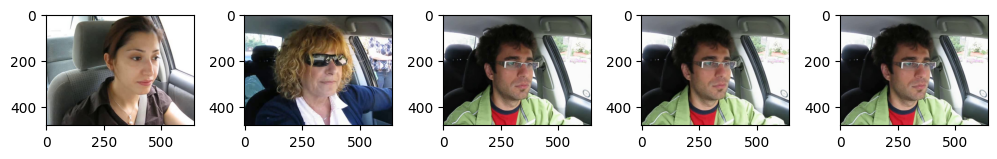

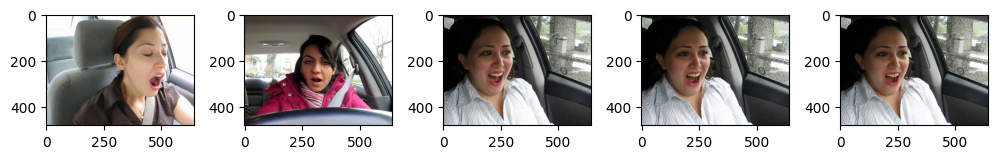

In [3]:
data_path = './data/train'
directories = ['/Closed', '/Open', '/no_yawn', '/yawn']
for j in directories:
    plot_imgs(data_path+j)

In [4]:
train_datagen = ImageDataGenerator(horizontal_flip = True,
                                  rescale = 1./255,
                                  zoom_range = 0.2,
                                  validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
batch_size = 128
train_data_path = './data/train'
test_data_path = './data/test'
train_set = train_datagen.flow_from_directory(train_data_path, batch_size = batch_size,
                                                                color_mode = 'grayscale',
                                                                class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_data_path, batch_size = batch_size,
                                                            color_mode = 'grayscale',
                                                            class_mode = 'categorical')
train_set

Found 2467 images belonging to 4 classes.
Found 433 images belonging to 4 classes.


AttributeError: 'DirectoryIterator' object has no attribute 'show'

In [6]:
classes = 4
model = Sequential()

model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (256,256,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(classes, activation = 'softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

In [8]:
model_path = "cnnCat2.h5"
checkpoint = ModelCheckpoint(model_path,
                             monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [10]:
training_steps = train_set.n//train_set.batch_size
validation_steps = test_set.n//test_set.batch_size
num_epochs = 10
history = model.fit_generator(train_set, epochs=num_epochs,
                              steps_per_epoch=training_steps,
                              validation_data=test_set,
                              validation_steps=validation_steps,
                              callbacks = callbacks_list)

C:\Users\hongt\AppData\Local\Temp\ipykernel_19636\990857528.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_set, epochs=num_epochs,


Epoch 1/10
19/19 [==============================] - ETA: 0s - loss: 1.2721 - accuracy: 0.3818 
Epoch 1: val_accuracy improved from -inf to 0.49479, saving model to yawn_detection1.h5
19/19 [==============================] - 231s 12s/step - loss: 1.2721 - accuracy: 0.3818 - val_loss: 0.8983 - val_accuracy: 0.4948
Epoch 2/10
19/19 [==============================] - ETA: 0s - loss: 0.7000 - accuracy: 0.6900 
Epoch 2: val_accuracy improved from 0.49479 to 0.72135, saving model to yawn_detection1.h5
19/19 [==============================] - 215s 11s/step - loss: 0.7000 - accuracy: 0.6900 - val_loss: 0.6301 - val_accuracy: 0.7214
Epoch 3/10
19/19 [==============================] - ETA: 0s - loss: 0.5110 - accuracy: 0.7606 
Epoch 3: val_accuracy improved from 0.72135 to 0.79167, saving model to yawn_detection1.h5
19/19 [==============================] - 222s 12s/step - loss: 0.5110 - accuracy: 0.7606 - val_loss: 0.5175 - val_accuracy: 0.7917
Epoch 4/10
19/19 [==============================] - 

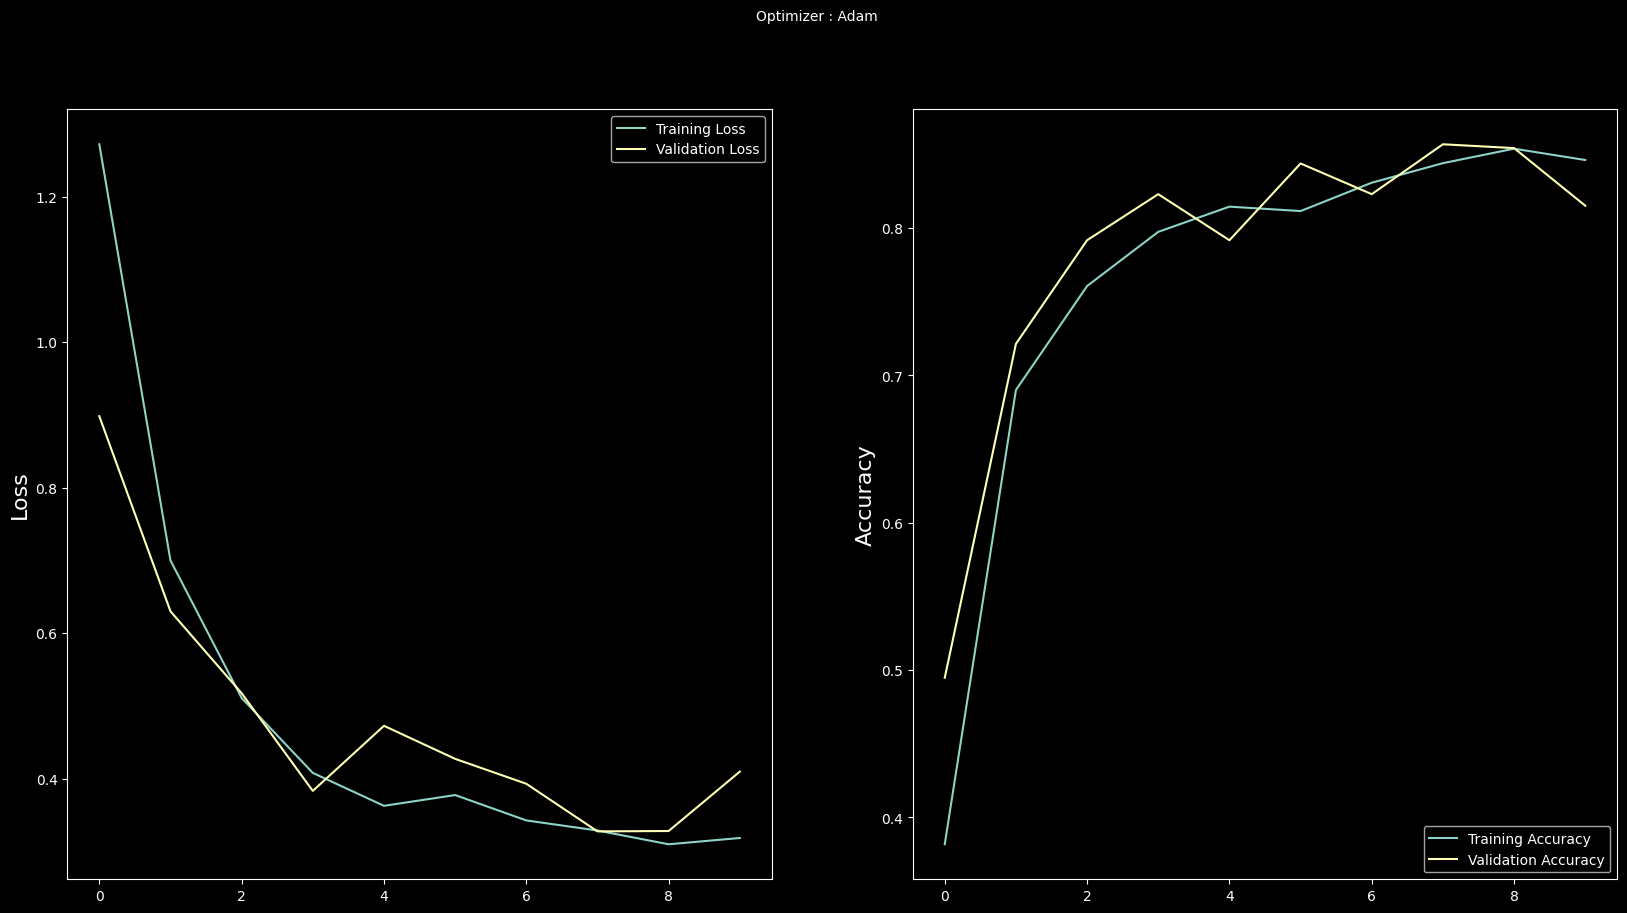

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()